In [4]:
import pandas as pd
import numpy as np

In [5]:
columns = [f'V{i}' for i in range(1, 29)]

# add more col name to columns
columns.insert(0, 'time')
columns.append('amount')
columns.append('target')
columns

# read data
df = pd.read_csv('./data/card.csv', names=columns)


In [6]:
# view data
df.head()

,time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,amount,target
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
# get the predictor and traget variables

X = df.loc[:, 'time':'amount']
y = df['target']

In [8]:
# shape pf the data
X.shape, y.shape

((284807, 30), (284807,))

In [9]:
# test data into train_validate and test
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=33)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=(1/8), random_state=33)

In [10]:
# shape of the data
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape


((199364, 30), (28481, 30), (56962, 30), (199364,), (28481,), (56962,))

In [11]:
# scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [36]:


hyper_param_options = [
    # activation function relu
    # {'hidden_layer_sizes': (30), 'activation': 'relu', 'alpha': 0.0001, 'batch_size': 50, 'learning_rate_init': 0.001,   'random_state': 33,  'verbose': True},
    # {'hidden_layer_sizes': (60), 'activation': 'relu', 'alpha': 0.0001, 'batch_size': 50, 'learning_rate_init': 0.001,   'random_state': 33,  'verbose': True},
    # {'hidden_layer_sizes': (90), 'activation': 'relu', 'alpha': 0.0001, 'batch_size': 50, 'learning_rate_init': 0.001,   'random_state': 33,  'verbose': True},
    # {'hidden_layer_sizes': (30), 'activation': 'relu', 'alpha': 0.0001, 'batch_size': 100, 'learning_rate_init': 0.001,   'random_state': 33,  'verbose': True},
    # {'hidden_layer_sizes': (60), 'activation': 'relu', 'alpha': 0.0001, 'batch_size': 100, 'learning_rate_init': 0.001,   'random_state': 33,  'verbose': True},
    # {'hidden_layer_sizes': (90), 'activation': 'relu', 'alpha': 0.0001, 'batch_size': 100, 'learning_rate_init': 0.001,   'random_state': 33,  'verbose': True},
    # # activation function tanh
    # {'hidden_layer_sizes': (30), 'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 50, 'learning_rate_init': 0.001,   'random_state': 33,  'verbose': True},
    # {'hidden_layer_sizes': (60), 'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 50, 'learning_rate_init': 0.001,   'random_state': 33,  'verbose': True},
    # {'hidden_layer_sizes': (90), 'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 50, 'learning_rate_init': 0.001,   'random_state': 33,  'verbose': True},
    # {'hidden_layer_sizes': (30), 'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 100, 'learning_rate_init': 0.001,   'random_state': 33,  'verbose': True},
    # {'hidden_layer_sizes': (60), 'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 100, 'learning_rate_init': 0.001,   'random_state': 33,  'verbose': True},
    # {'hidden_layer_sizes': (90), 'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 100, 'learning_rate_init': 0.001,   'random_state': 33,  'verbose': True},
    # change the acrhitecture
    # {'hidden_layer_sizes': (60, 30), 'activation': 'relu', 'alpha': 0.0001, 'batch_size': 50, 'learning_rate_init': 0.001,   'random_state': 33,  'verbose': True},
    # {'hidden_layer_sizes': (60, 30, 20), 'activation': 'relu', 'alpha': 0.0001, 'batch_size': 50, 'learning_rate_init': 0.001,   'random_state': 33,  'verbose': True},
    # {'hidden_layer_sizes': (60, 30, 20, 10), 'activation': 'relu', 'alpha': 0.0001, 'batch_size': 50, 'learning_rate_init': 0.001,   'random_state': 33,  'verbose': True},
    # {'hidden_layer_sizes': (60, 30), 'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 100, 'learning_rate_init': 0.001,   'random_state': 33,  'verbose': True},
    # {'hidden_layer_sizes': (60, 30, 20), 'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 100, 'learning_rate_init': 0.001,   'random_state': 33,  'verbose': True},
    # {'hidden_layer_sizes': (60, 30, 20, 10), 'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 100, 'learning_rate_init': 0.001,   'random_state': 33,  'verbose': True}, 
    # {'hidden_layer_sizes': (32, 18, 6, 2), 'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 100, 'learning_rate_init': 0.001,   'random_state': 33,  'verbose': True}

    # change initial learning rate with activation function tanh, batch size 50 and architecture 32
    # {'hidden_layer_sizes': (20), 'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 50, 'learning_rate_init': 0.0001,   'random_state': 33,  'verbose': True},
    # {'hidden_layer_sizes': (28), 'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 50, 'learning_rate_init': 0.0001,   'random_state': 33,  'verbose': True},
    # {'hidden_layer_sizes': (30), 'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 50, 'learning_rate_init': 0.0001,   'random_state': 33,  'verbose': True},
    # {'hidden_layer_sizes': (32), 'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 50, 'learning_rate_init': 0.0001,   'random_state': 33,  'verbose': True},
    # {'hidden_layer_sizes': (36), 'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 50, 'learning_rate_init': 0.0001,   'random_state': 33,  'verbose': True},

    # best params so far with activation function tanh, batch size 100, learning_rate_init 0.0001 and architecture 32
    # {'hidden_layer_sizes': (30), 'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 50, 'learning_rate_init': 0.0001,   'random_state': 33,  'verbose': True},
    # {'hidden_layer_sizes': (30), 'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 75, 'learning_rate_init': 0.0001,   'random_state': 33,  'verbose': True},
    # {'hidden_layer_sizes': (30), 'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 100, 'learning_rate_init': 0.0001,   'random_state': 33,  'verbose': True},
    # {'hidden_layer_sizes': (30), 'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 150, 'learning_rate_init': 0.0001,   'random_state': 33,  'verbose': True},
    # {'hidden_layer_sizes': (30), 'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 200, 'learning_rate_init': 0.0001,   'random_state': 33,  'verbose': True},

    # best params so far with activation function tanh, batch size 100, learning_rate_init 0.001, solver sgd, learning_rate adaptive and architecture 30
    {'hidden_layer_sizes': (30), 'activation': 'tanh', 'batch_size': 100, 'solver': 'sgd', 'learning_rate_init': 0.01, 'learning_rate': 'adaptive', 'random_state': 33,  'verbose': True},
    {'hidden_layer_sizes': (30), 'activation': 'tanh', 'batch_size': 100, 'solver': 'sgd', 'learning_rate_init': 0.001, 'learning_rate': 'adaptive', 'random_state': 33,  'verbose': True},
    {'hidden_layer_sizes': (30), 'activation': 'tanh', 'batch_size': 100, 'solver': 'sgd', 'learning_rate_init': 0.0001, 'learning_rate': 'adaptive', 'random_state': 33,  'verbose': True},


]

from sklearn.neural_network import MLPClassifier

def train_model(id, hyper_params):
    mlp_classifier = MLPClassifier(**hyper_params).fit(X_train_scaled, y_train)
    train_score = mlp_classifier.score(X_train_scaled, y_train)
    val_score = mlp_classifier.score(X_val_scaled, y_val)
    test_score = mlp_classifier.score(X_test_scaled, y_test)
    return {
        'id': id,
        'hidden_layers': mlp_classifier.n_layers_ - 2,
        'architecture': mlp_classifier.hidden_layer_sizes,
        'activation': hyper_params['activation'],
        'solver': hyper_params['solver'],
        'batch_size': hyper_params['batch_size'],
        'learning_rate_init': hyper_params['learning_rate_init'],
        'learning_rate': hyper_params['learning_rate'],
        'iterations': mlp_classifier.n_iter_,
        'train_score': train_score,
        'val_score': val_score,
        'test_score': test_score,
    }


In [37]:
observations_df = pd.DataFrame()

for index,hyper_param_option in enumerate(hyper_param_options):
    print(f"Training model {index}, with hyper params: {hyper_param_option}")
    result = train_model(index, hyper_param_option)
    result_df = pd.DataFrame([result])
    observations_df = pd.concat([observations_df, result_df], ignore_index=True)  
    print(f"Training model {index}, with hyper params: {hyper_param_option} completed")
    print("Test results: ", observations_df.iloc[index])

observations_df.to_csv('./data/observations.csv', mode='a',index=False)

Training model 0, with hyper params: {'hidden_layer_sizes': 30, 'activation': 'tanh', 'batch_size': 100, 'solver': 'sgd', 'learning_rate_init': 0.01, 'learning_rate': 'adaptive', 'random_state': 33, 'verbose': True}
Iteration 1, loss = 0.01339956
Iteration 2, loss = 0.00339689
Iteration 3, loss = 0.00308715
Iteration 4, loss = 0.00292665
Iteration 5, loss = 0.00278040
Iteration 6, loss = 0.00269872
Iteration 7, loss = 0.00263662
Iteration 8, loss = 0.00258221
Iteration 9, loss = 0.00254363
Iteration 10, loss = 0.00250517
Iteration 11, loss = 0.00247824
Iteration 12, loss = 0.00243345
Iteration 13, loss = 0.00241175
Iteration 14, loss = 0.00238691
Iteration 15, loss = 0.00237011
Iteration 16, loss = 0.00234250
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.002000
Iteration 17, loss = 0.00229375
Iteration 18, loss = 0.00228691
Iteration 19, loss = 0.00228229
Iteration 20, loss = 0.00227835
Iteration 21, loss = 0.00227499
Iterati

In [38]:
observations_df

,id,hidden_layers,architecture,activation,solver,batch_size,learning_rate_init,learning_rate,iterations,train_score,val_score,test_score
0,0,1,30,tanh,sgd,100,0.0100,adaptive,82,0.999594,0.999438,0.999508
1,1,1,30,tanh,sgd,100,0.0010,adaptive,77,0.999473,0.999368,0.999350
2,2,1,30,tanh,sgd,100,0.0001,adaptive,82,0.999368,0.999298,0.999175


In [45]:
from sklearn.metrics import confusion_matrix


params = {
    'hidden_layer_sizes': (30), 
    'activation': 'tanh', 
    'alpha': 0.0001, 
    'batch_size': 100, 
    'learning_rate_init': 0.001,  
    'random_state': 33,  
    'verbose': True
    }

mlp_classifier = MLPClassifier(**params).fit(X_train_scaled, y_train)
y_pred = mlp_classifier.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)

Iteration 1, loss = 0.03331534
Iteration 2, loss = 0.00309743
Iteration 3, loss = 0.00272658
Iteration 4, loss = 0.00255233
Iteration 5, loss = 0.00248779
Iteration 6, loss = 0.00238446
Iteration 7, loss = 0.00227328
Iteration 8, loss = 0.00222404
Iteration 9, loss = 0.00209071
Iteration 10, loss = 0.00203846
Iteration 11, loss = 0.00201007
Iteration 12, loss = 0.00190546
Iteration 13, loss = 0.00185026
Iteration 14, loss = 0.00182062
Iteration 15, loss = 0.00178613
Iteration 16, loss = 0.00168027
Iteration 17, loss = 0.00162781
Iteration 18, loss = 0.00158216
Iteration 19, loss = 0.00155894
Iteration 20, loss = 0.00147610
Iteration 21, loss = 0.00142374
Iteration 22, loss = 0.00139327
Iteration 23, loss = 0.00136684
Iteration 24, loss = 0.00130610
Iteration 25, loss = 0.00128075
Iteration 26, loss = 0.00122158
Iteration 27, loss = 0.00119432
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


<Axes: >

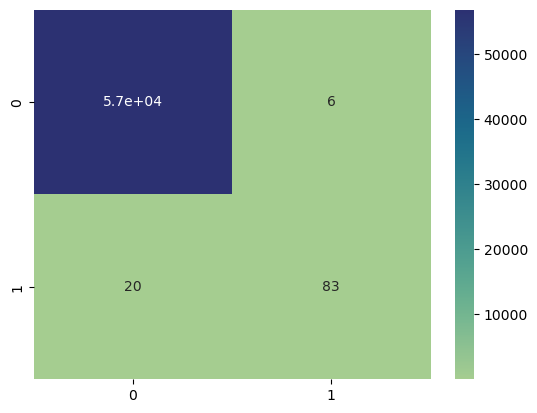

In [46]:
import seaborn as sns
sns.heatmap(cm, cmap='crest',annot=True)